In [ ]:
# cloning github repository, because dataset present in this repository
!git clone https://github.com/Ranjit-Singh-786/fracture_detection_yoloV8.git

In [1]:
## unzip the dataset, which we have clone from github
!unzip archive\ \(1\).zip

In [ ]:
#installing dependency
!pip install -r requirements.txt

In [7]:
# importing yolo from ultralytics
from ultralytics import YOLO

In [ ]:
# loading yolov8x.pt pre-trained model
# first time it will get download in your current working directory
yolov8 = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:01<00:00, 75.5MB/s]


In [19]:
# We are testing yolov8 pre-trained model by detecting a new data point
pred = yolov8.predict(source='dog.jpg', save=True , save_txt=True)


image 1/1 /content/drive/MyDrive/fracture_detection/dog.jpg: 448x640 1 dog, 71.2ms
Speed: 2.0ms preprocess, 71.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


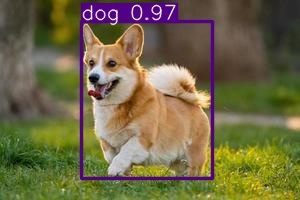

In [20]:
# after get detected , we are displaying the detected dog image by yolo v8
from IPython.display import Image
Image("/content/drive/MyDrive/fracture_detection/runs/detect/predict/dog.jpg")

### Now we are training yolo V8 on custome dataset,
we choosed bon facture dataset to re-train yolo V8 model, and dataset zip file is already available in the github repository called "archive (1).zip"<br>
initially we have unziped this file, in which you will get annotated data in YOLO format.<br>
there is one "data.yaml" file, that is containg data of our dataset, so for the training we will pass the path of data.yaml file, during the trainin algorithm will automatically determine our dataset. because data.yaml file has , dataset path, no. of class , names of all class.<br>

In [ ]:
# so this is sinle command, to train your yolo V8 model on a custome dataset.
!yolo task=detect mode=train model='yolov8x.pt' data='data.yaml' epochs=100 imgsz=300

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

### Model Evaluation

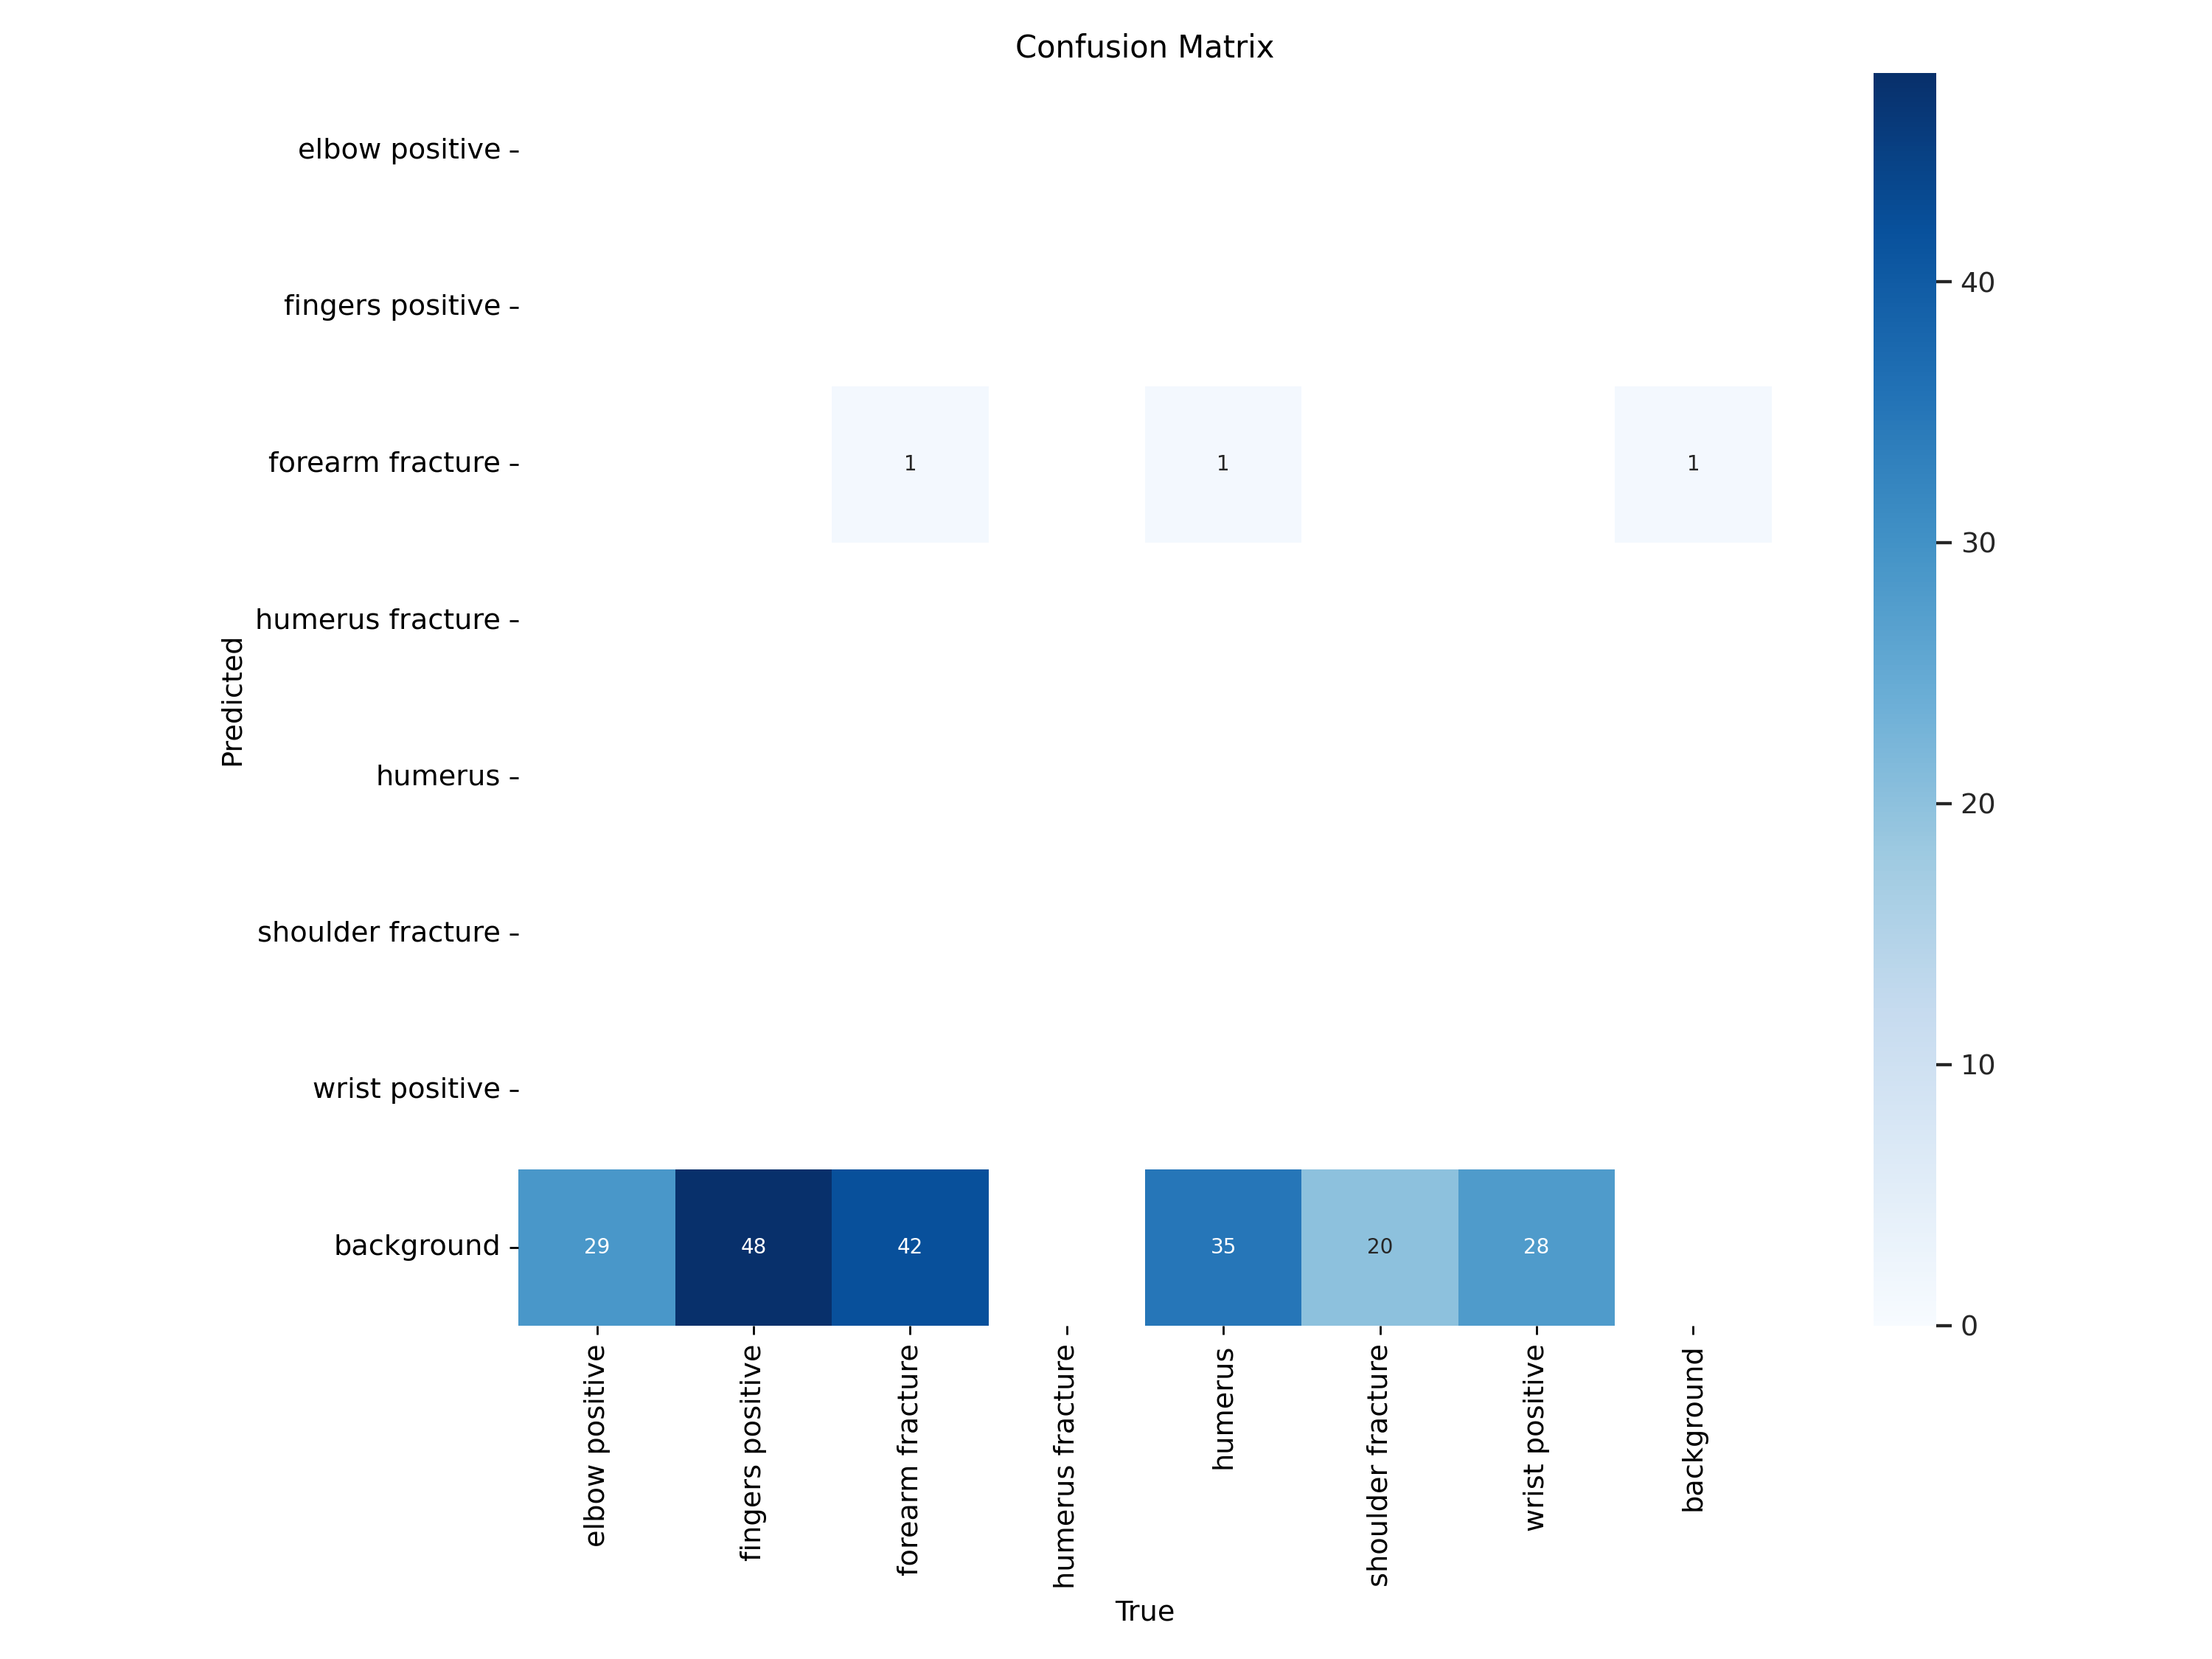

In [1]:
# This confusion metrics image build by yolov8 model trainin, so we are just displaying this metrics 
# We have not good results, because i dont have a good resaurce to traine this model,
# so train this model only with epoch=10
# if you want to some good result try with atleast epochs=500,

from IPython.display import Image
metrics_chart_path = "/content/drive/MyDrive/fracture_detection/runs/detect/train/confusion_matrix.png"
Image(filename=metrics_chart_path, width=1000)  # view results.png

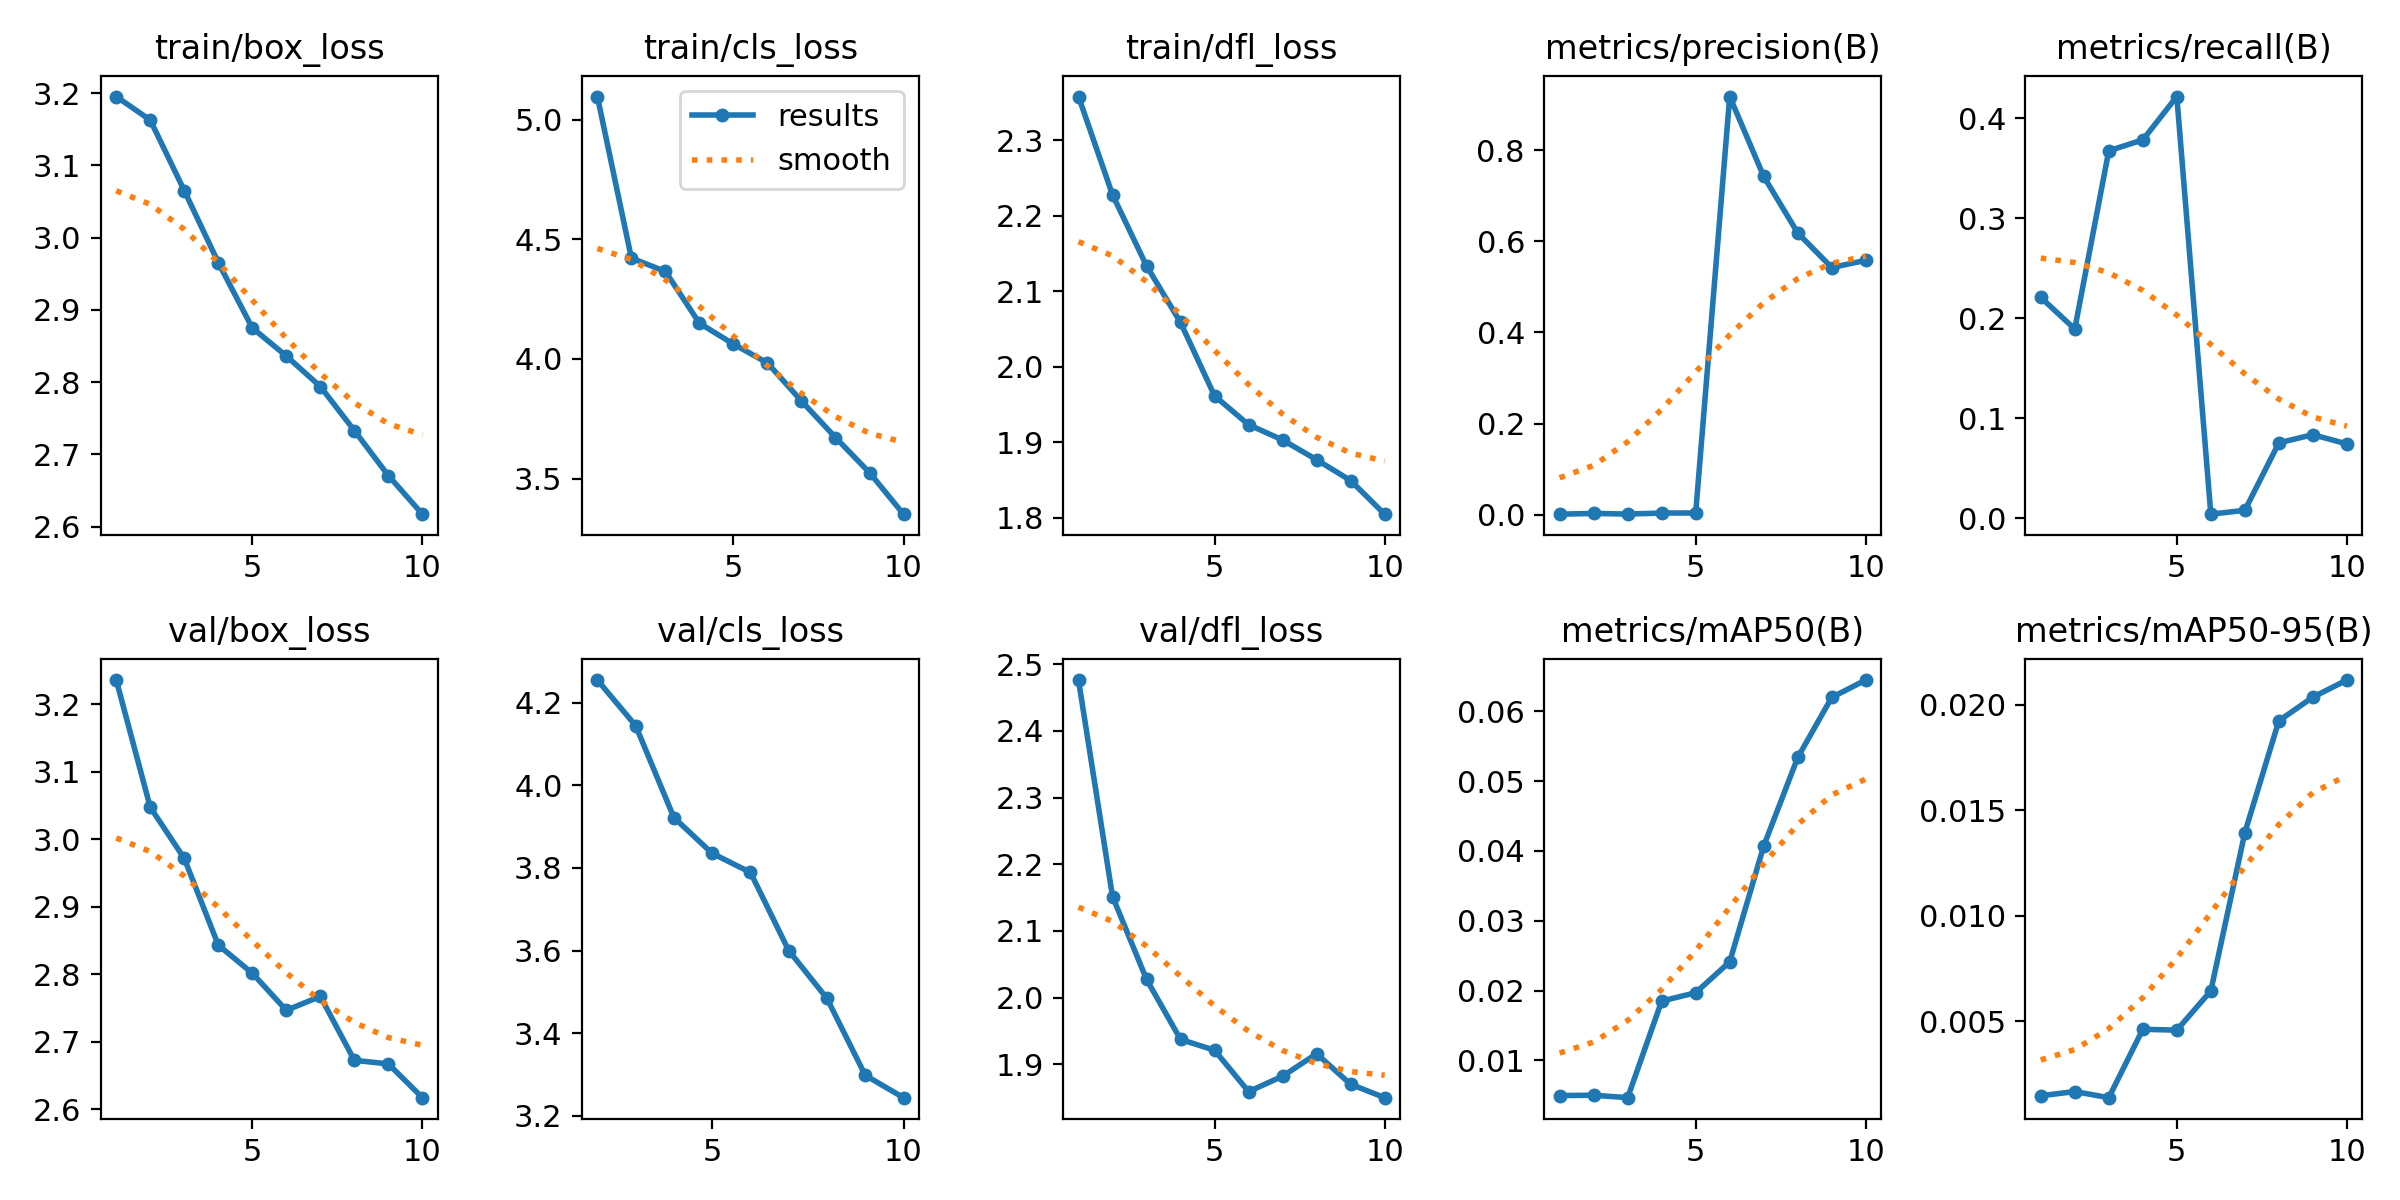

In [22]:
# Line chart to understand model performance during the training, at every epochs

from IPython.display import Image
metrics_chart_path = "/content/drive/MyDrive/fracture_detection/runs/detect/train/results.png"
Image(filename=metrics_chart_path, width=1000)  

val_batch0_labels.jpg:


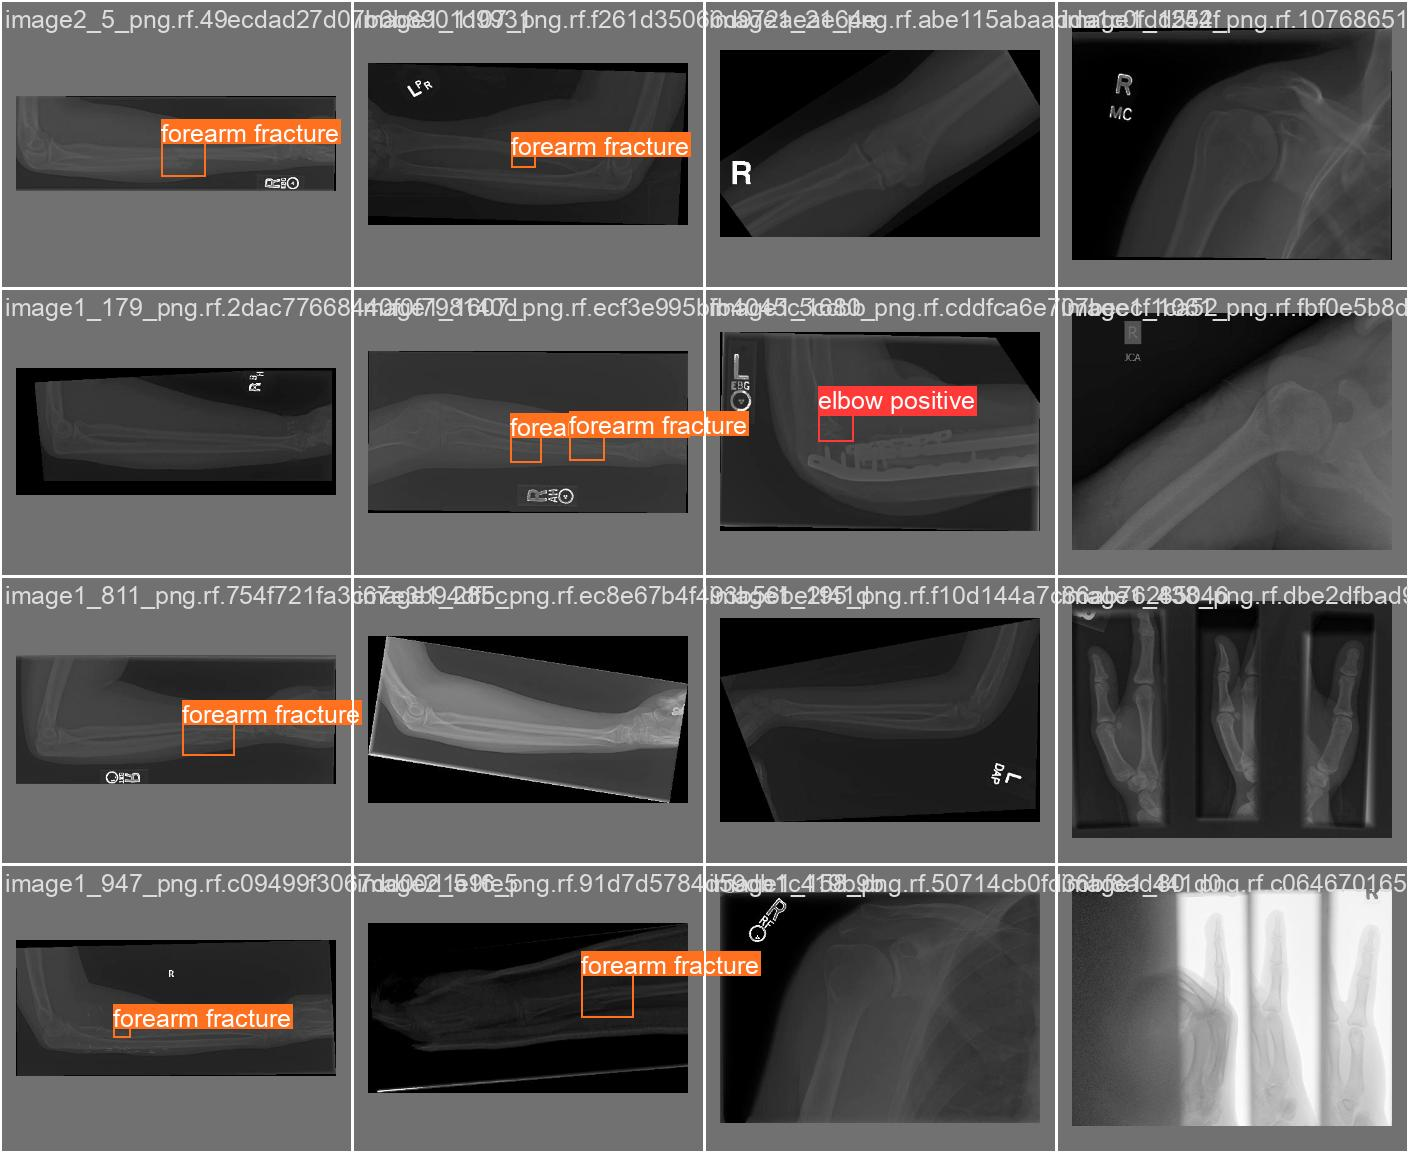

In [25]:
## Ground Truth Data with labels & boxes
print("val_batch0_labels.jpg:")
Image(filename='/content/drive/MyDrive/fracture_detection/runs/detect/train/val_batch0_labels.jpg', width=900)

val_batch0_pred.jpg:


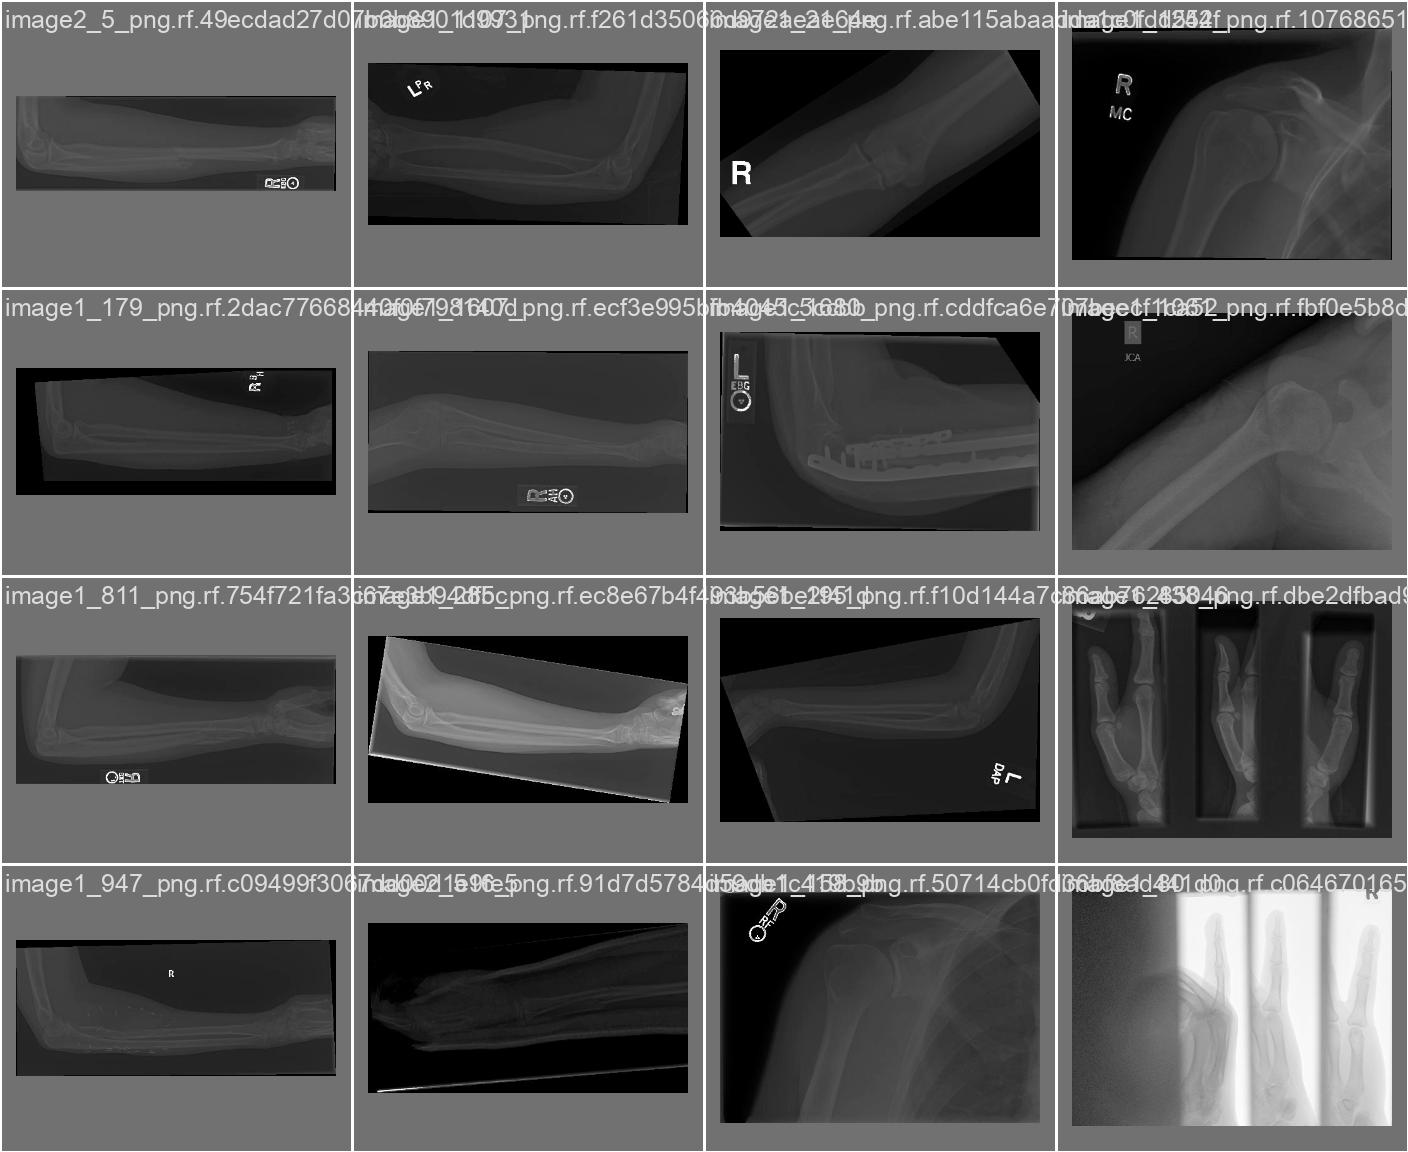

In [26]:
## Prediction on Ground Truth Data
print("val_batch0_pred.jpg:")
Image(filename='/content/drive/MyDrive/fracture_detection/runs/detect/train/val_batch0_pred.jpg', width=900)

# model is not recoginsed anything with default confidence score,
# when we will check prediction on with minued confidence score, then you will get
# detection image.

### Testing model on new data points
1. you can test model with single image.    <-- pass the path
2. you can test model with multiple images simultaneously,  <-- pass the path
3. you can test your model with videos. <-- pass the path
4. you can test your model with webcame. <-- set source=0

Get a prediction on single data point

In [21]:
# Getting prediction with single data points
!yolo task=detect mode=predict model="/content/drive/MyDrive/fracture_detection/runs/detect/train/weights/best.pt" conf=0.5 source="/content/image1_206_png.rf.9af7b509cfc87217908dfda627136bf8.jpg"

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68130309 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 /content/image1_206_png.rf.9af7b509cfc87217908dfda627136bf8.jpg: 320x288 (no detections), 144.4ms
Speed: 1.4ms preprocess, 144.4ms inference, 70.1ms postprocess per image at shape (1, 3, 320, 288)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


Get a prediction on multiple data point simulatneously

In [31]:
# GEtting with multplile  images 
!yolo task=detect mode=predict model="/content/drive/MyDrive/fracture_detection/runs/detect/train/weights/best.pt" conf=0.03 source="/content/test_data/*.jpg"

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68130309 parameters, 0 gradients, 257.4 GFLOPs

image 1/10 /content/test_data/image1_206_png.rf.9af7b509cfc87217908dfda627136bf8.jpg: 320x288 (no detections), 119.4ms
image 2/10 /content/test_data/image1_237_png.rf.3c70555567d76e1b792a000d60404ff7.jpg: 256x320 1 fingers positive, 86.6ms
image 3/10 /content/test_data/image1_250_png.rf.e310e0db325a7658edf360b19df8f77a.jpg: 256x320 (no detections), 29.6ms
image 4/10 /content/test_data/image1_278_png.rf.aed420df47119889bd8af834c3e1c7b8.jpg: 320x256 2 fingers positives, 78.2ms
image 5/10 /content/test_data/image1_296_png.rf.21cdb7c1c82a8992ceda7a17f7e5512e.jpg: 320x224 2 forearm fractures, 79.4ms
image 6/10 /content/test_data/image1_316_png.rf.61dbf14487cee0fdf8a82602742726a0.jpg: 320x256 (no detections), 30.1ms
image 7/10 /content/test_data/image1_399_png.rf.df2e9f74adbd02e52c25268903aa1c97.jpg: 320x288 (no detections), 

### Display all prediction images
Display all the predicted or detected images, as you can see my yolov8 model is not detected anything from our unseen data points, this does not meant that we have wrongly trained our model. Actually our all training steps are fine, but we got only 2% MAP accuracy, we trained our model with epochs=10, so we need more epochs, to get result by model, accuracy is very low thats, why our model is not able to recognize anything from the unseen images.

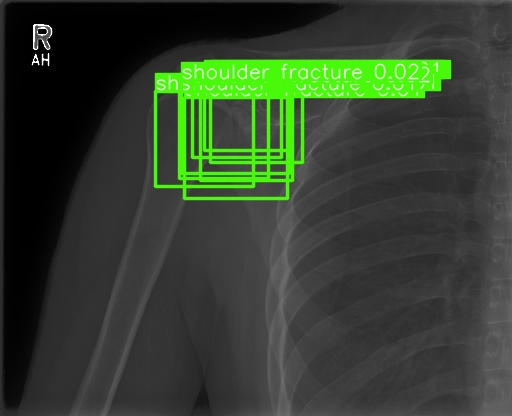

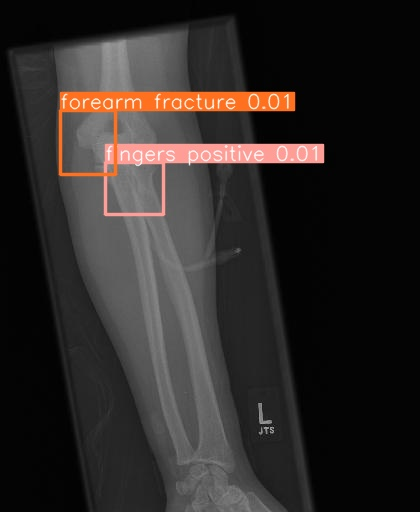

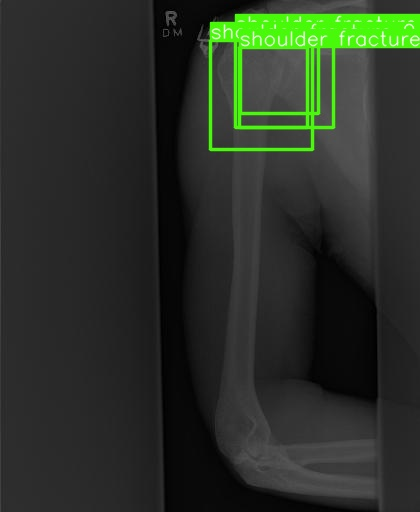

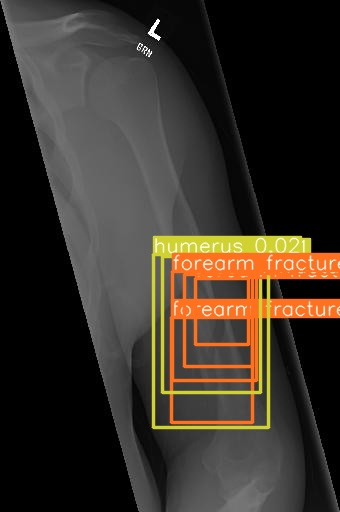

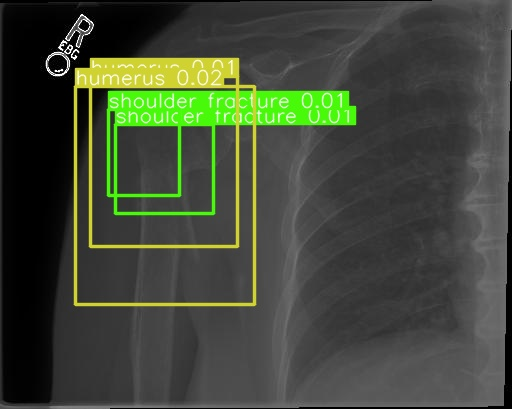

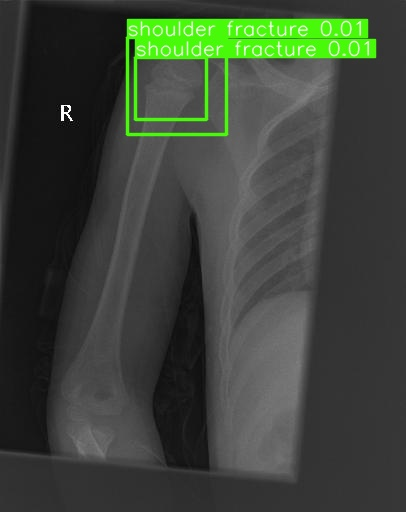

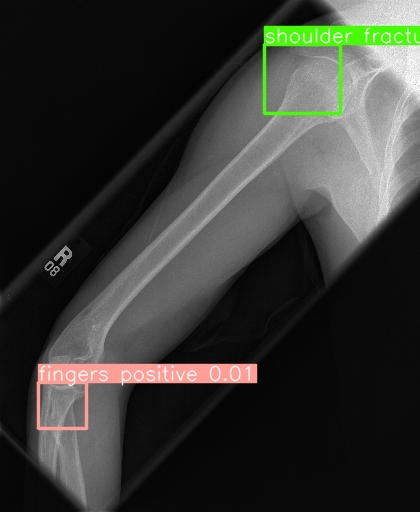

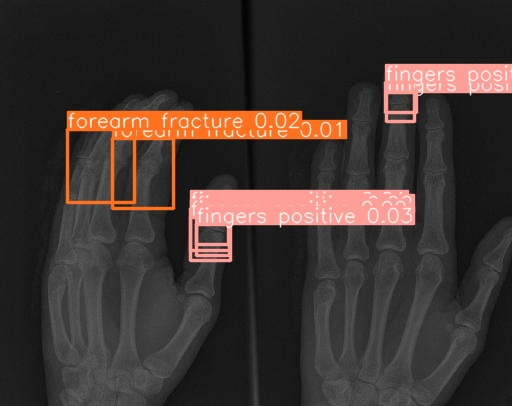

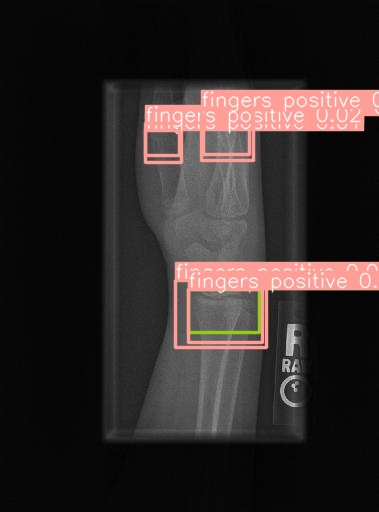

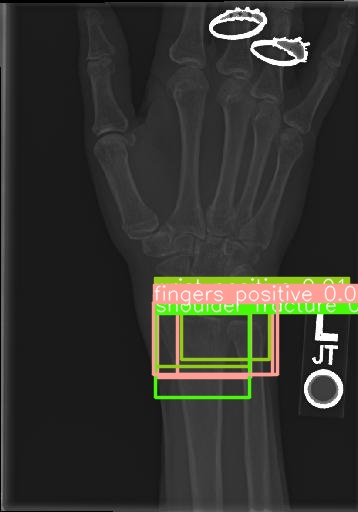

In [33]:
import glob
from IPython.display import Image,display

path_of_all_detected_images = glob.glob('/content/runs/detect/predict5/*.jpg')
for path in path_of_all_detected_images:
  display(Image(filename=path,height=400,width=400))

### Thank you
some of  them files are not uploaded in this repository, due to large file size,<br>
but my motive of this repository is that, describing all the steps of object detection using yolov8 with custome dataset,<br>
so i write down all the steps of fine tuning yolov8 with custome dataset,<br>
still you have  any confusion, feel free to connect on <a href="https://www.linkedin.com/in/ranjit-singh-423a051a6/">Linkedin</a>